# Challenge : Image Segmentation

1. Dataset Details : http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
2. Dataset Downloaded from : https://www.kaggle.com/jessicali9530/celeba-dataset
3. Project Name : Smile Recognition 
4. Submitted by : Anusha Kankari
5. Aim : The main objective of this project was to explore data and built models using few machine and deep learning algortihms that predicts whether the image is smiling or not with maximum accuracy and minimum error value. 

We considered this as a classification problem with "Smiling" column as target with binary values. We performed various data exploratory and preprocessing analysis before implementing models. As part of model construction, we implemented various machine and deep learning algorithms to see how our dataset performs on different models. We considered various metrics to evaluate these model and finally conclude the best model that suits well to our dataset and achieve our goal.

Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import warnings
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\f

# Data Exploration and Preprocessing
The initial step we consider in this project is to explore the data like what are different celebrity images and it's attributes given in the dataset. As part of preprocessing, we applied below various data mining techniques to ensure a meaningful and good quality of data is fitted in model construction and evaluation.
1. Imported and explored the img_align_celeba file to analyze different celebrity images.
2. Imported the 'list_attr_celeba' csv file to analyze different attributes of each image.
3. Verified whether the dataset is imbalanced or not by plotting a graph on target column "Smiling".
4. Checked for missing and null values.
5. One-hot encoding isn't required because there is no categorical attribute.
6. Normalization isn't required because all the attributes contains binary value 0 and 1 only.
7. Implemented Heatmap to understand correlation between features.
8. Plotted a bar chart that explains how remaining attributes are dependent on that target column 'Smiling'.
9. In future, this bar chart can be used for feature selection. For this project, we din't eliminate any attribute.
10. Plotted images imported from step 1, to understand attributes of that images. Example:If we render female image with smiling face then, attributes like Male =0 and Smiling =1


In [2]:
#Parameter initialization

main_folder = "C:/Users/kanka/OneDrive/Desktop/Internship/CelebImages/img_align_celeba/"
images_folder = main_folder + "img_align_celeba"
attribute_folder = main_folder + 'list_attr_celeba.csv'
img_shape = (128, 128, 3)

In [3]:
#********Import images from "img_align_celeba" file*************

images = os.listdir(images_folder)
print("Total number of celebrity images from the folder are "+ ":" + str(len(images)))


Total number of celebrity images from the folder are :1449


In [4]:
#*************Convert list of images into array and resize each image to 128*128 pixels ************

def get_data(data_path) :
    X = []
    for filename in data_path :
        img = img_to_array(load_img(images_folder + "/" + filename, target_size = img_shape[:2]))
        X.append(img)
    X = np.array(X).astype('float32')
    
    return X

dataset = get_data(images)

type(dataset) #nump array type
print("Size of the each image" +":"+ str(dataset.shape)) #first argument is number of images, second,third 
                                                            #argument is height and width and final one is RGB

Size of the each image:(1449, 128, 128, 3)


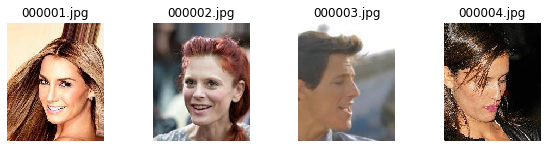

In [5]:
#Code to plot the celebrity images from images array
plt.figure(figsize=(10,10))
for i, name in enumerate(images[:4]):
    plt.subplot(4, 4, i + 1)
    img = plt.imread(images_folder + '/' + name)
    plt.imshow(img)
    plt.title(name)
    plt.axis('off')
    
    

Now that we explored what kind of images are present in our dataset. Let's import the other dataset that contains attributes information of each image.

In [6]:
#Import dataset that contains 40 attribute values for each picture
df_attr = pd.read_csv(attribute_folder)
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True)
df_attr

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
202596.jpg,0,0,0,0,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
202597.jpg,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


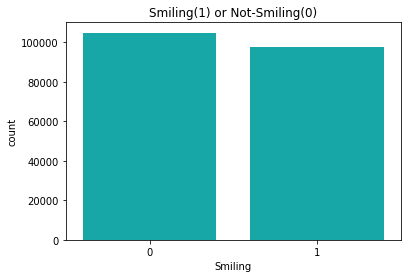

In [7]:
#******Graph that explains count of images that are smiling and not-smiling to under if dataset is imbalanced or not****#
plt.title('Smiling(1) or Not-Smiling(0)')
sns.countplot(x='Smiling', data=df_attr, color="c")
plt.show()

In [8]:
#************Checking data type of each attribute to check if any categorical attribute exists***********
df_attr.dtypes

5_o_Clock_Shadow       int64
Arched_Eyebrows        int64
Attractive             int64
Bags_Under_Eyes        int64
Bald                   int64
Bangs                  int64
Big_Lips               int64
Big_Nose               int64
Black_Hair             int64
Blond_Hair             int64
Blurry                 int64
Brown_Hair             int64
Bushy_Eyebrows         int64
Chubby                 int64
Double_Chin            int64
Eyeglasses             int64
Goatee                 int64
Gray_Hair              int64
Heavy_Makeup           int64
High_Cheekbones        int64
Male                   int64
Mouth_Slightly_Open    int64
Mustache               int64
Narrow_Eyes            int64
No_Beard               int64
Oval_Face              int64
Pale_Skin              int64
Pointy_Nose            int64
Receding_Hairline      int64
Rosy_Cheeks            int64
Sideburns              int64
Smiling                int64
Straight_Hair          int64
Wavy_Hair              int64
Wearing_Earrin

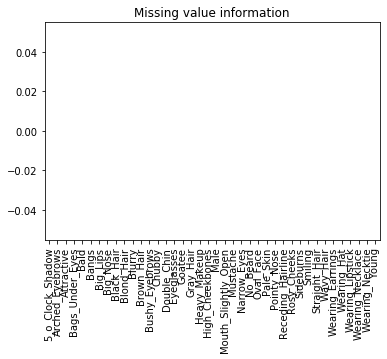

In [9]:
#*********Checking for missing values*****************
Missingvalue_stats = df_attr.isnull().sum()
plt.title("Missing value information")
Missingvalue_stats.plot(kind='bar') #Bar chart to plot count of missing values

Correlation Analysis using Heat Map : We already verified that our dataset has no missing values. Our data set consists of 40 columns, there is a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap. The intensity of colour whether they are positively or negatively correlated. Here the dark red is postive and light red represents negative correlation

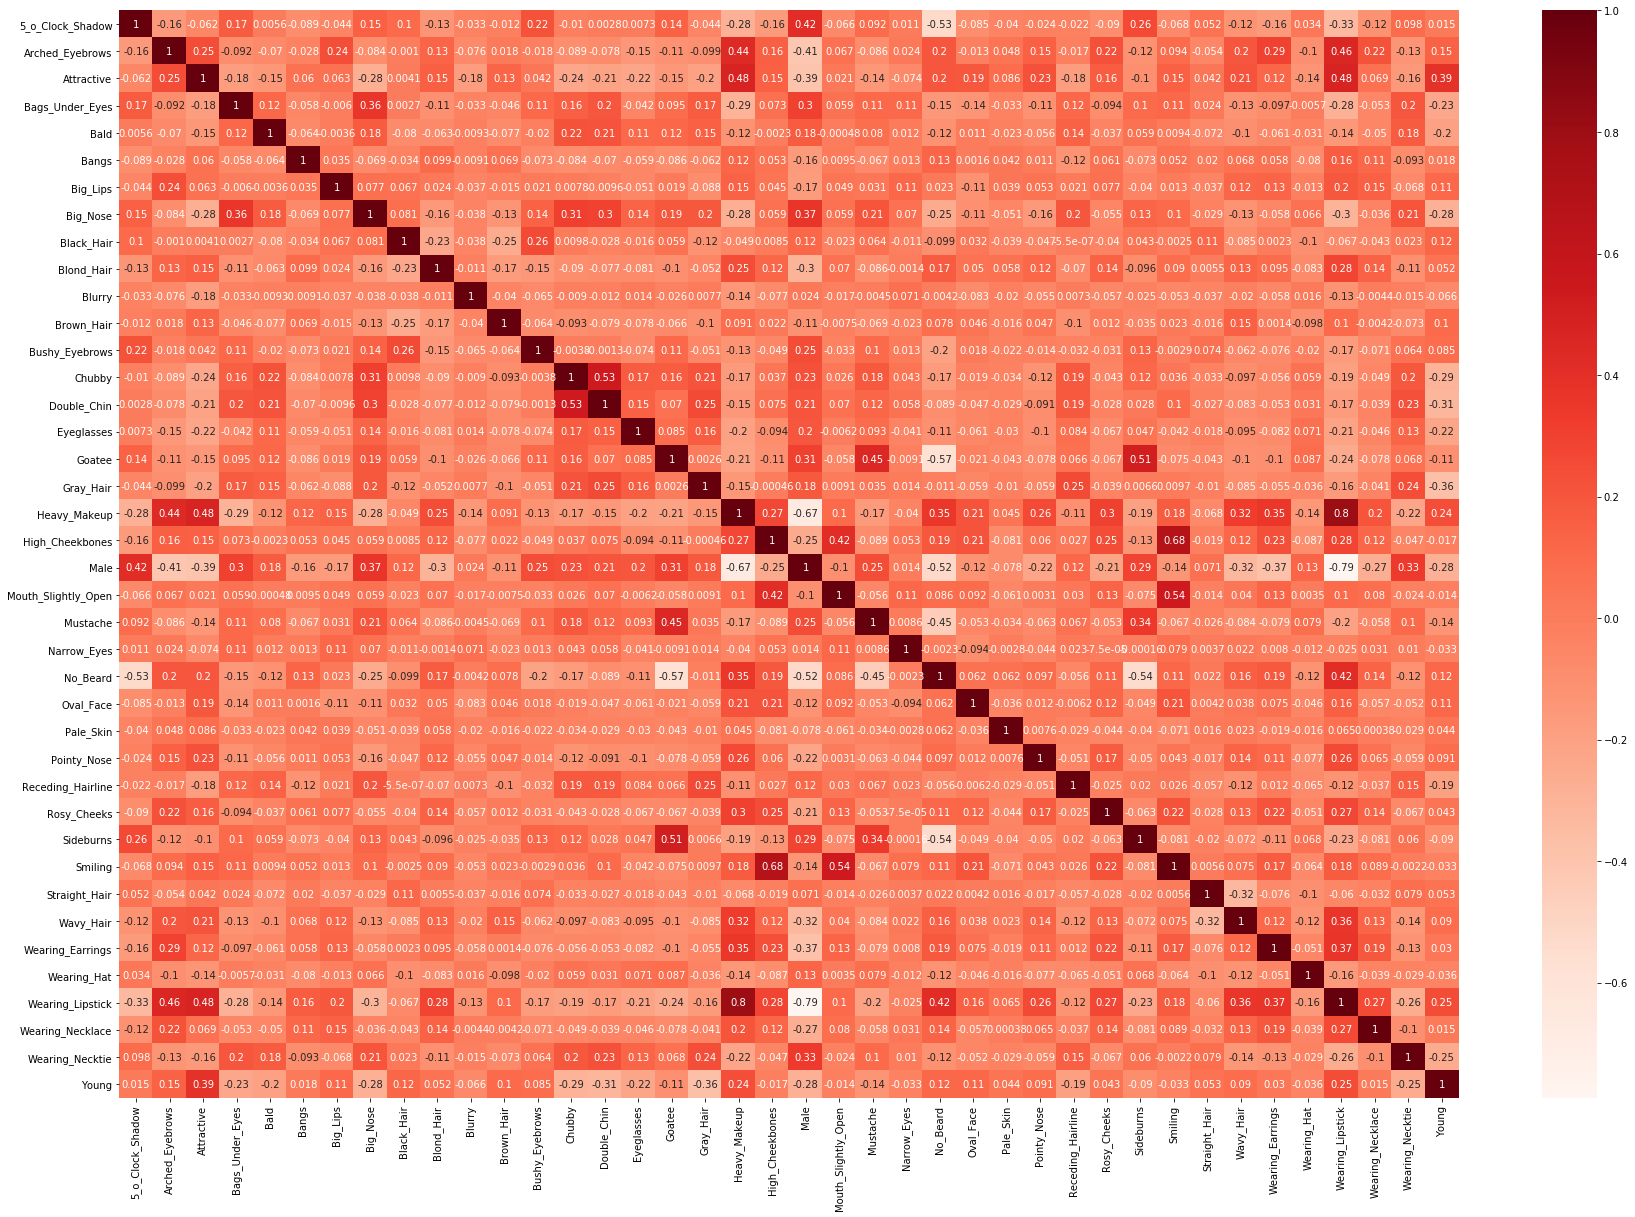

In [10]:
plt.figure(figsize=(30,20))
cor = df_attr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Now let's understand how the remaining attributes are correlated on our target column "Smiling"

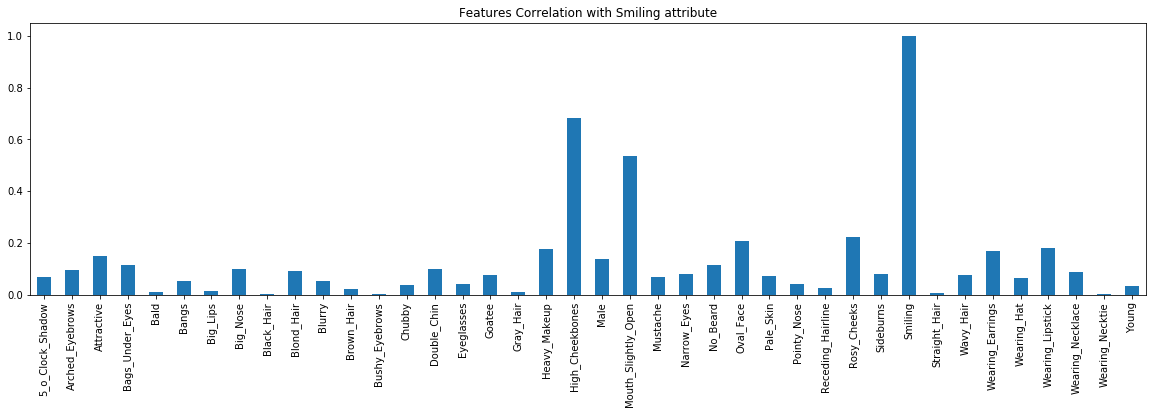

In [11]:
plt.figure(figsize=(20,5))
cor_target = abs(cor["Smiling"])
plt.title("Features Correlation with Smiling attribute")
cor_target.plot(kind='bar')

In the bar chart above, we can clearly say that High_Cheekbones, Mouth_Slightly_Queen, Oval_Face etc attributes are highly correlated with Smiling attribute.We can also see that, Bald, Black_Hair, Gray_Hair, Straight_Hair, Wearning_Necktie are negatively correlated on Smiling attribute. As part of feature selection, in future to improve model performance we can eliminate these columns. In this project, we haven't eliminated any of these columns as we observed our model performances are better than expected.

Let's select few celebrity images from 'img_align_celeba' file and find the attributes of that image from 'list_attr_celeba.csv' file. To get a better understanding of attributes on rendering the celebrity image.

Attributes of the image are 
Smiling    1
Male       0
Young      1
Name: 000506.jpg, dtype: int64


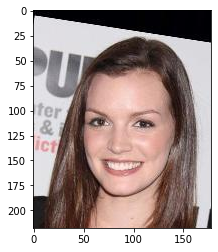

In [12]:
example_img = images_folder+ '/' + '000506.jpg' #Selected "000506.jpg" image from image folder
img = load_img(example_img)
plt.grid(False)
plt.imshow(img)
img_attributes = df_attr.loc[example_img.split('/')[-1]][['Smiling','Male','Young']] # using image_id, retrieving the attributes of the image.
print("Attributes of the image are " + '\n'+ str(img_attributes))

Attributes of the image are 000004.jpg 
Smiling    0
Male       0
Young      1
Name: 000004.jpg, dtype: int64


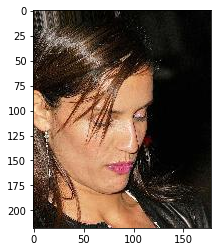

In [13]:
example_img = images_folder+ '/' + '000004.jpg' #Selected "000004.jpg" image from image folder
img = load_img(example_img)
plt.grid(False)
plt.imshow(img)
img2_attr = df_attr.loc[example_img.split('/')[-1]][['Smiling','Male','Young']]

print("Attributes of the image are 000004.jpg " + '\n'+ str(img2_attr))

# Split the dataset into train/vailidate/test
We used train_test_split() function and divided the dataset into 90% traning, 5% validation and 5% test datasets

In [14]:
X = df_attr.drop('Smiling',axis=1) #All the attributes except the target column
Y= df_attr['Smiling'] #Target column

In [15]:
from sklearn.model_selection import train_test_split

#The first split divides dataset into 90% training and 10% testing datasets
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state= None)

#The second split divides the test datasets into 50% validation and 50% test datasets
x_test, x_validation, y_test, y_validation = train_test_split(x_test,y_test,test_size = 0.5, random_state= None)

In [16]:
print("Shape of X_original attribute dataset" + ":" + str(X.shape))
print("Shape of Y_original_target atrribute dataset" + " :"+ str(Y.shape))
print("Shape of X_training dataset" + ": " +str(x_train.shape))
print("Shape of Y_target_training dataset" + ": " +str(y_train.shape))
print("Shape of X_test dataset" + ": " +str(x_test.shape))
print("Shape of Y_ target_test dataset" + ": " +str(y_test.shape))
print("Shape of X_validation dataset" + ": " +str(x_validation.shape))
print("Shape of Y_validation_dataset" + ": " +str(y_validation.shape))


Shape of X_original attribute dataset:(202599, 39)
Shape of Y_original_target atrribute dataset :(202599,)
Shape of X_training dataset: (182339, 39)
Shape of Y_target_training dataset: (182339,)
Shape of X_test dataset: (10130, 39)
Shape of Y_ target_test dataset: (10130,)
Shape of X_validation dataset: (10130, 39)
Shape of Y_validation_dataset: (10130,)


Befor feeding data to neural network, it's always an optimal way to check the shape of the arrays and reshape them accordingly

In [17]:
#*********converting to numpy array**************
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_validation = y_validation.to_numpy()

In [18]:
y_train_reshaped = y_train.reshape([y_train.shape[0],1])
y_test_reshaped = y_test.reshape([y_test.shape[0],1])
y_validation_reshaped = y_validation.reshape([y_validation.shape[0],1])

In [19]:
print(y_train_reshaped.shape)
print(y_test_reshaped.shape)
print(y_validation_reshaped.shape)

(182339, 1)
(10130, 1)
(10130, 1)


# Model Construction

Now that we have our training, validation and test datasets it's time to construct models. In this project we implemented two machine learning and three deep neural networks using tensor flow keras and tensor flow programming frameworks. We implemented below models.
1. Logistic Classification model.
2. Adaboosting model.
3. Neural network with single hidden layer using tensor flow.
4. Neural network with single hidden layer using keras.
5. Neural netwokr with 2 hidden layers and tuned hyper parameters.




# Linear classification model

LinearLogisticModel accuracy on validation Data :  0.8506416584402764
Confusion matrix of validation data
[[4545  696]
 [ 817 4072]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5241
           1       0.85      0.83      0.84      4889

    accuracy                           0.85     10130
   macro avg       0.85      0.85      0.85     10130
weighted avg       0.85      0.85      0.85     10130

AUC value for LinearLogisticModel validation data
0.9218118865410081


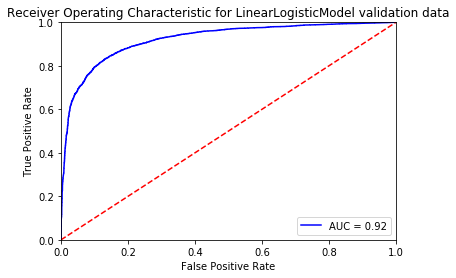

LinearLogisticModel accuracy on test data :  0.8499506416584403
Confusion matrix for test data
[[4520  725]
 [ 795 4090]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5245
           1       0.85      0.84      0.84      4885

    accuracy                           0.85     10130
   macro avg       0.85      0.85      0.85     10130
weighted avg       0.85      0.85      0.85     10130

AUC value for LinearLogisticModel test data
0.924385597044707


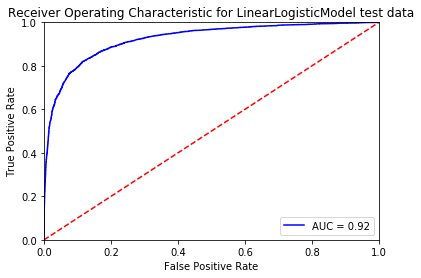

In [20]:
from sklearn.linear_model import LogisticRegression

#Linear Regression algorithm
LinearLogisticModel = LogisticRegression()

#****************Train the algorithm on training data ***************#
LinearLogisticModel.fit(x_train, y_train)

#****************Prediction and Metrics calculation on validation data set******************#

pred_valid=LinearLogisticModel.predict(x_validation)
print("LinearLogisticModel accuracy on validation Data : ",accuracy_score(y_validation, pred_valid, normalize = True))
# confusion matrix for validation dataset
print("Confusion matrix of validation data")
print(confusion_matrix(y_validation, pred_valid))
print(classification_report(y_validation, pred_valid))

# calcualte probabilty for each validation instance
probs_valid = LinearLogisticModel.predict_proba(x_validation)
preds_valid = probs_valid[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_validation,preds_valid,pos_label=None)
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)

print("AUC value for LinearLogisticModel validation data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for LinearLogisticModel validation data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#****************Prediction and Metrics calculation on test data set******************#
#predict using the testing data
pred_test=LinearLogisticModel.predict(x_test)
print("LinearLogisticModel accuracy on test data : ",accuracy_score(y_test, pred_test, normalize = True))
# confusion matrix for test data
print("Confusion matrix for test data")
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test,pred_test))


# calcualte probabilty for each test instance
probs = LinearLogisticModel.predict_proba(x_test)
preds = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_test,preds,pos_label=None)
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for LinearLogisticModel test data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for LinearLogisticModel test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# AdaBoosting Model

Ada_boosting accuracy  on validation data:  0.8498519249753208
Confusion matrix for Ada_boosting on validation data
[[4520  721]
 [ 800 4089]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5241
           1       0.85      0.84      0.84      4889

    accuracy                           0.85     10130
   macro avg       0.85      0.85      0.85     10130
weighted avg       0.85      0.85      0.85     10130

AUC value for AdaBoosting on validation data
0.9216583540986547


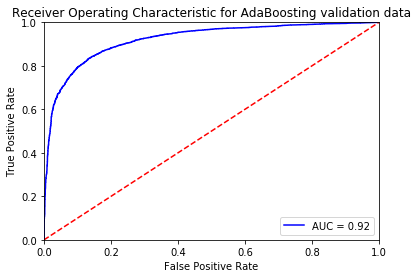

Ada_boosting accuracy  on test data:  0.8484698914116485
Confusion matrix for Ada_boosting on test data
[[4488  757]
 [ 778 4107]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5245
           1       0.84      0.84      0.84      4885

    accuracy                           0.85     10130
   macro avg       0.85      0.85      0.85     10130
weighted avg       0.85      0.85      0.85     10130

AUC value for AdaBoosting on test data
0.924255980984961


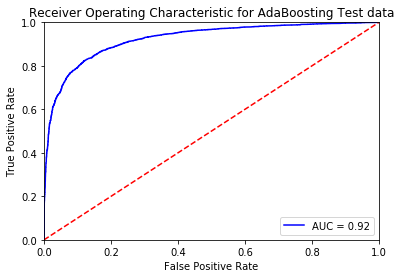

In [21]:
from sklearn.ensemble import AdaBoostClassifier

Ada_boosting = AdaBoostClassifier(n_estimators=100)
Ada_boosting.fit(x_train, y_train)

#****************Prediction and Metrics calculation on validation data set******************#
pred_validation=Ada_boosting.predict(x_validation)
print("Ada_boosting accuracy  on validation data: ",accuracy_score(y_validation, pred_validation, normalize = True))
# confusion matrix for AdaBoosting_Model
print("Confusion matrix for Ada_boosting on validation data")
print(confusion_matrix(y_validation, pred_validation))
print(classification_report(y_validation,pred_validation))

# calcualte probabilty for each validation instance
probs = Ada_boosting.predict_proba(x_validation)
preds = probs[:,1]
# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_validation,preds,pos_label=None)
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for AdaBoosting on validation data")
print(roc_auc)

# ROC curve code for validation set
plt.title('Receiver Operating Characteristic for AdaBoosting validation data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#****************Prediction and Metrics calculation on test data set******************#
#predict using the testing data
pred=Ada_boosting.predict(x_test)
print("Ada_boosting accuracy  on test data: ",accuracy_score(y_test, pred, normalize = True))
# confusion matrix for AdaBoosting_Model
print("Confusion matrix for Ada_boosting on test data")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

# calcualte probabilty for each test instance
probs = Ada_boosting.predict_proba(x_test)
preds = probs[:,1]
# calculates the false positive  and true positive rate points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_test,preds,pos_label=None)
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for AdaBoosting on test data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for AdaBoosting Test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Evaluation for machine learning algorithms :
To evaluate the best model between logistic and Adaboosting we considered metrics like true positives, false positives, precision, recall, f1score from confusion matrix and also AUC and ROC curves. After seeing above metrics, both the algorithms were equally performing better. But, if we consider the true positives and AUC values with a very minute percent the Adaboosting model performance is better than logistic linear model.

# Deep learning models using TensorFlow and Keras
We tried to implement different networks to see the cost value is decreasing for every epoch and have maximum accuracy for prediction. Let's see what we did for each model step-by-step.


# Neural network with 2 hidden layers using tensor flow
In this network, we added two hidden layers with 50 and 70 hidden units and 'tanh' and 'relu' activation functions respectively. We even applied dropout regularization technique to avoid overfitting problem. On the output layer we used 'sigmoid' activation function. We used mini-batch algorithm to train the neural network with parameters like training_epochs = 200,batch_size = 1000, learning rate = 0.01. We computed the the overall cost for every forward and backward propogation i.e 1 epoch. Evaluated the model performance by calculating it's accuracy on test sets.

In [20]:
#******************Multilayer neural network design***************

def multilayer_NN_1(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) # layer 1 performs x*w[h1]+b[h1]
    A_layer_1 = tf.nn.tanh(layer_1) # Applying "tanh" activation function for layer 1's linear output value
    A_layer_1 = tf.nn.dropout(A_layer_1, keep_prob) #Applying dropout regularization to avoid overfitting
    layer_2 = tf.add(tf.matmul(A_layer_1, weights['h2']), biases['b2']) #layer performs layer1_output*w[h2] + b[h2]
    A_layer_2 = tf.nn.relu(layer_2) #Applying "relu" activation function on layer 2
    A_layer_2 = tf.nn.dropout(A_layer_2, keep_prob) 
    out_layer = tf.add(tf.matmul(A_layer_2, weights['out']), biases['out']) #Final layer
    out_layer = tf.nn.sigmoid(out_layer) #Applying "sigmoid" activation function to final layer
    return out_layer

In [21]:
#***************Initialising the required parameters for neural network***********

n_hidden_1 = 50
n_hidden_2 =70
n_input = x_train.shape[1]
n_classes = y_train_reshaped.shape[1]

#*****weights for each hidden units of a layer****************

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

#************biases for each hidden units of a layer*****************

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
training_epochs = 200
display_step = 50
batch_size = 1000


#*************Creating placeholder ****************
a = tf.placeholder("float", [None, n_input])
b = tf.placeholder("float", [None, n_classes])

In [23]:
predictions = multilayer_NN_1(a, weights, biases, keep_prob)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predictions, labels=b))

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
#******Code that trains the network using mini-batches and evaluate the performance

with tf.Session() as sess: #creating a tensor flow session
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): #loop to train data in mini-batches
        avg_cost = 0.0
        total_batch = int(len(x_train) / batch_size)
        x_batches = np.array_split(x_train, total_batch)
        y_batches = np.array_split(y_train_reshaped, total_batch)
        for i in range(total_batch):
            batch_x, batch_y = x_batches[i], y_batches[i]
            _, c = sess.run([optimizer, cost], #Calculates the cost for each batch
                            feed_dict={
                                a: batch_x, 
                                b: batch_y, 
                                keep_prob: 0.8
                            })
            avg_cost += c / total_batch
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print("Optimization Finished!")
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(b, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) #predicting the accuracy of model
    print("Accuracy:", accuracy.eval({a: x_test, b: y_test_reshaped, keep_prob: 1.0}))

Epoch: 0001 cost= 0.000000000
Epoch: 0051 cost= 0.000000000
Epoch: 0101 cost= 0.000000000
Epoch: 0151 cost= 0.000000000
Optimization Finished!
Accuracy: 1.0


We clearly saw above that the cost function is constant after every epoch and accuracy is 100%, which clearly says that the model is facing overfitting issue. Then, we tried to tune parameters by adding more hidden layers, hidden nodes, applying different activation functions at each layer, number of epochs, batch-size, learning rate and also the optimizers to enhance the performance of neural network

# Neural Network with only one Hidden layer using keras
We uses only one hidden layer with 40 nodes and linear activation on it. On output layer, we applied sigmoid activation function. Compare to above model built using tensor flows, we modified the optimizer algorithm to 'RMSprop'

In [16]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(40, input_dim=39, activation='linear')) #Layer 1 with 40 hidden units and linear activation function
model.add(Dense(1, activation='sigmoid')) #Output layer with sigmoid activation function
model.summary()

model.compile(loss='mse', optimizer= 'RMSprop', metrics=['mse','mae','accuracy']) #Using "Root mean square propagation" optimizer
neural_train=model.fit(x_train, y_train, batch_size=100, epochs= 100, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
182339/182339 [==============================] - 2s 10us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - mean_absolute_error: 0.2357 - acc: 0.8443
Epoch 2/100
182339/182339 [==============================] - 2s 9us/sample - loss: 0.1067 - mean_squared_error: 0.1067 - mean_absolute_error: 0.2137 - acc: 0.8525
Epoch 3/100
182339/182339 [==============

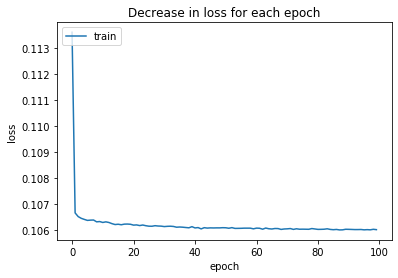

In [41]:
plt.plot(neural_train.history['loss'])
plt.title('Decrease in loss for each epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

This graph explains the decrease in the loss after every epoch which is great. Now let's evaluate its performance on test and validation datasets.

In [39]:
# Evaluate the model on the test and validation data`
print('\n Evaluate on validation and test data ')
results_validation= model.evaluate(x_validation, y_validation, batch_size=128)
print('Neural network performance on validation data its loss, test acc:', results)
results_test = model.evaluate(x_test, y_test, batch_size=128)
print('Neural network performance on test data its test loss, test acc:', results)




 Evaluate on validation and test data 
10130/10130 [==============================] - 0s 4us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - mean_absolute_error: 0.2092 - acc: 0.8508
Neural network performance on validation data its loss, test acc: [0.10790567684436891, 0.10790567, 0.21204433, 0.85103655]
10130/10130 [==============================] - 0s 4us/sample - loss: 0.1079 - mean_squared_error: 0.1079 - mean_absolute_error: 0.2120 - acc: 0.8510
Neural network performance on test data its test loss, test acc: [0.10790567684436891, 0.10790567, 0.21204433, 0.85103655]


The overall loss is around 0.1 and both the accuracies are approximately 85% which is great and there is no overfitting issue here. Let's try to tune more to see if we can increase the accuracy values.

# Neural network with 2 hidden layer and tuned Hyper parameters using keras

In [42]:
#**********Neural network with 2 hidden layers and different nodes and activation functions******************

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
model_2 = Sequential()
model_2.add(Dense(50, input_dim=39, activation='relu'))#Layer 1 with 50 hidden units and 'relu' activation function
model_2.add(Dense(40, input_dim=39, activation='linear'))#Layer 2 with 40 hidden units and 'linear' activation function
model_2.add(Dense(1, activation='sigmoid'))#Output layer with sigmoid activation fuction
model_2.summary()

model_2.compile(loss='mse', optimizer= 'adam', metrics=['mse','mae','accuracy'])  #Using "Adam" optimiser algorithm
neural_train_2=model_2.fit(x_train, y_train, batch_size=15, epochs= 200, verbose=1)#Decreased the batch_size and increased epochos

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                2000      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
182339/182339 [==============================] - 11s 60us/sample - loss: 0.1061 - mean_squared_error: 0.1061 - mean_absolute_error: 0.2124 - acc: 0.8541
Epoch 2/200
182339/182339 [==============================] - 11s 61us/sample - loss: 0.1030 - mean_squared_error: 0.1030 - mean_absolute_error: 0.2068 - acc: 0.8582
Epoch 3/200
182339/182339 [==============================] - 12s 67us/samp

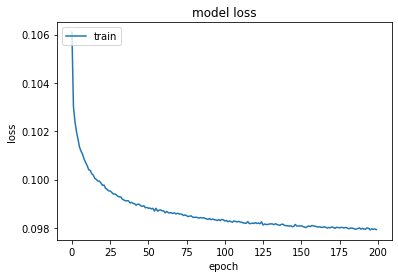

In [43]:
plt.plot(neural_train_2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Compare to above model, here we increased the number of epochs, reduced the batch size and appplied one of the best "Adam" optimizing algorithm to reduce error and increase accuracy of the model.

In [45]:
# Evaluate the model on the test and validation data
print('\n Evaluate on validation and test data ')
results_validation= model_2.evaluate(x_validation, y_validation, batch_size=128)
print('Neural network performance on validation data its loss, test acc:', results)
results_test = model_2.evaluate(x_test, y_test, batch_size=128)
print('Neural network performance on test data its test loss, test acc:', results)




 Evaluate on validation and test data 
10130/10130 [==============================] - 0s 22us/sample - loss: 0.1057 - mean_squared_error: 0.1057 - mean_absolute_error: 0.2029 - acc: 0.8521
Neural network performance on validation data its loss, test acc: [0.10790567684436891, 0.10790567, 0.21204433, 0.85103655]
10130/10130 [==============================] - 0s 15us/sample - loss: 0.1048 - mean_squared_error: 0.1048 - mean_absolute_error: 0.2039 - acc: 0.8579
Neural network performance on test data its test loss, test acc: [0.10790567684436891, 0.10790567, 0.21204433, 0.85103655]


In this model, during traning if you see loss at last epoch it is 0.09 with 86% accuracy. Compare to previous model there is slight increase the test and validation accuracies too.

# Conclusion:
After looking at all the accuracies and other metrics with very slight difference the deep learning model with two hidden layers is performing really well with around 86% accuracy and less loss value.